# **Data Load**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/LdaTopicModel.csv', sep=',', encoding='utf-8', quotechar='"')
df.head()

,text,type,processed_Text,vector
0,WASHINGTON (Reuters) - The head of a conservat...,True,washington reuter head conservative republic...,[3. 0.10724926 6. 0.03345729 7...
1,WASHINGTON (Reuters) - Transgender people will...,True,washington reuters transgender people allow ...,[2. 0.07976317 4. 0.61162251 6...
2,WASHINGTON (Reuters) - The special counsel inv...,True,washington reuter special counsel investigat...,[0. 0.83036101 2. 0.02960292 7...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True,washington reuters trump campaign adviser ge...,[0. 0.83367079 2. 0.16247383]
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,seattlewashington reuters president donald t...,[3. 0.09799248 5. 0.59025931 6...


In [ ]:
# Check the type of the 'vector' column
print(df['vector'].dtype)

object


In [ ]:
unique_types = df['vector'].apply(type).unique()
print(unique_types)

[<class 'str'>]


In [ ]:
import numpy as np

# Function to convert string representations to numpy arrays
def parse_vector_string(vector_string):
    if isinstance(vector_string, str):
        # Remove square brackets and split by whitespace
        values = vector_string[1:-1].split()
        # Convert values to floats and return numpy array
        return np.array(values, dtype=float)
    elif vector_string is None:
        # If the input is None, return None
        return None
    else:
        # If the input is already a numpy array, return it as is
        return vector_string

# Convert 'vector' column to numpy arrays
df['vector'] = df['vector'].apply(parse_vector_string)

# Check the type of the 'vector' column after conversion
print(df['vector'].apply(type).unique())

[<class 'numpy.ndarray'>]


In [ ]:
df.head()

,text,type,processed_Text,vector
0,WASHINGTON (Reuters) - The head of a conservat...,True,washington reuter head conservative republic...,"[3.0, 0.10724926, 6.0, 0.03345729, 7.0, 0.0333..."
1,WASHINGTON (Reuters) - Transgender people will...,True,washington reuters transgender people allow ...,"[2.0, 0.07976317, 4.0, 0.61162251, 6.0, 0.2348..."
2,WASHINGTON (Reuters) - The special counsel inv...,True,washington reuter special counsel investigat...,"[0.0, 0.83036101, 2.0, 0.02960292, 7.0, 0.0119..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True,washington reuters trump campaign adviser ge...,"[0.0, 0.83367079, 2.0, 0.16247383]"
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,seattlewashington reuters president donald t...,"[3.0, 0.09799248, 5.0, 0.59025931, 6.0, 0.1333..."


# Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Padding or truncating function to ensure all vectors have the same length
def pad_or_truncate_vector(vector, length):
    if isinstance(vector, np.ndarray):
        if len(vector) < length:
            # Pad vector with zeros if it's shorter than the specified length
            return np.pad(vector, (0, length - len(vector)))
        elif len(vector) > length:
            # Truncate vector if it's longer than the specified length
            return vector[:length]
        else:
            return vector
    else:
        # Return a zero-filled vector if the input is not a numpy array
        return np.zeros(length)

# Define the desired length for the vectors
max_length = 100  # Adjust this value according to your data

# Pad or truncate vectors to the desired length
df['vector'] = df['vector'].apply(pad_or_truncate_vector, length=max_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['vector'], df['type'], test_size=0.2, random_state=42)

# List of classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multinomial Naive Bayes": MultinomialNB() # used for features representing counts or frequencies, where negative values don't make sense.
}

# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

--- Logistic Regression ---
--- Random Forest ---
--- Decision Tree ---
--- Support Vector Machine ---
--- Gradient Boosting ---
--- Multinomial Naive Bayes ---


In [ ]:
import warnings

# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Print the classification report without warnings
    with np.errstate(divide='ignore'):
        print(classification_report(y_test, y_pred, zero_division=1))


--- Logistic Regression ---
              precision    recall  f1-score   support

        Fake       0.67      0.72      0.70      4650
        True       0.67      0.63      0.65      4330

    accuracy                           0.67      8980
   macro avg       0.67      0.67      0.67      8980
weighted avg       0.67      0.67      0.67      8980

--- Random Forest ---
              precision    recall  f1-score   support

        Fake       0.87      0.91      0.89      4650
        True       0.90      0.85      0.87      4330

    accuracy                           0.88      8980
   macro avg       0.88      0.88      0.88      8980
weighted avg       0.88      0.88      0.88      8980

--- Decision Tree ---
              precision    recall  f1-score   support

        Fake       0.82      0.86      0.84      4650
        True       0.84      0.79      0.82      4330

    accuracy                           0.83      8980
   macro avg       0.83      0.83      0.83      8980
we

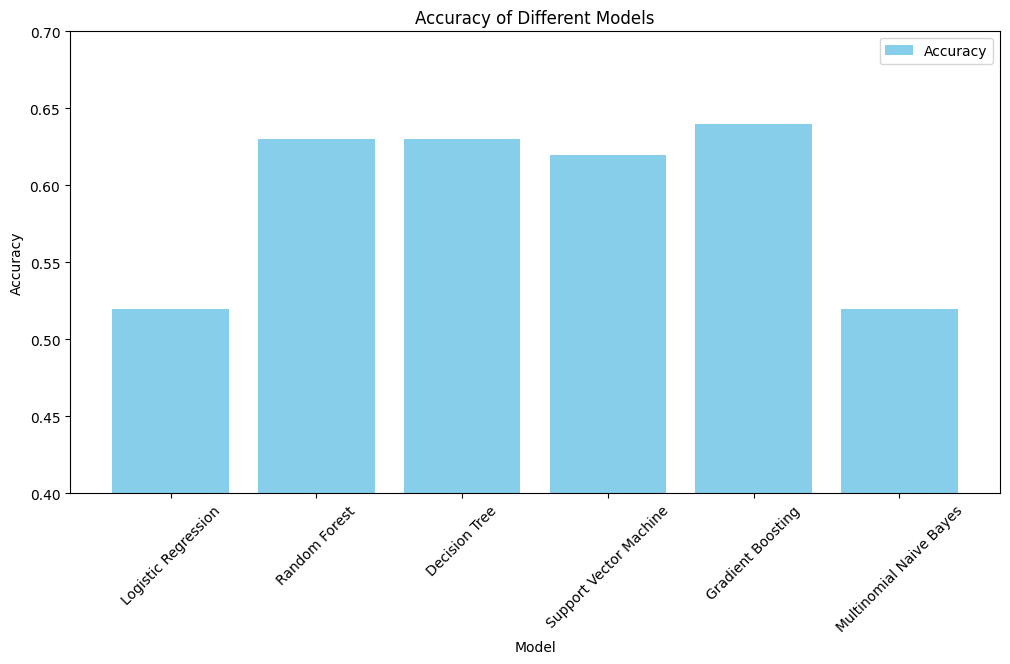

In [1]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
accuracy_scores = {
    "Logistic Regression": 0.52,
    "Random Forest": 0.63,
    "Decision Tree": 0.63,
    "Support Vector Machine": 0.62,
    "Gradient Boosting": 0.64,
    "Multinomial Naive Bayes": 0.52
}

# Plotting the bar graph for accuracy
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.4, 0.7)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Iterate over each classifier
for name, classifier in classifiers.items():
    print(f"--- {name} ---")

    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    print()


--- Logistic Regression ---
Confusion Matrix:
[[3340 1310]
 [1615 2715]]

--- Random Forest ---
Confusion Matrix:
[[4219  431]
 [ 668 3662]]

--- Decision Tree ---
Confusion Matrix:
[[4021  629]
 [ 901 3429]]

--- Support Vector Machine ---
Confusion Matrix:
[[3805  845]
 [1065 3265]]

--- Gradient Boosting ---
Confusion Matrix:
[[3981  669]
 [ 887 3443]]

--- Multinomial Naive Bayes ---
Confusion Matrix:
[[1562 3088]
 [ 776 3554]]



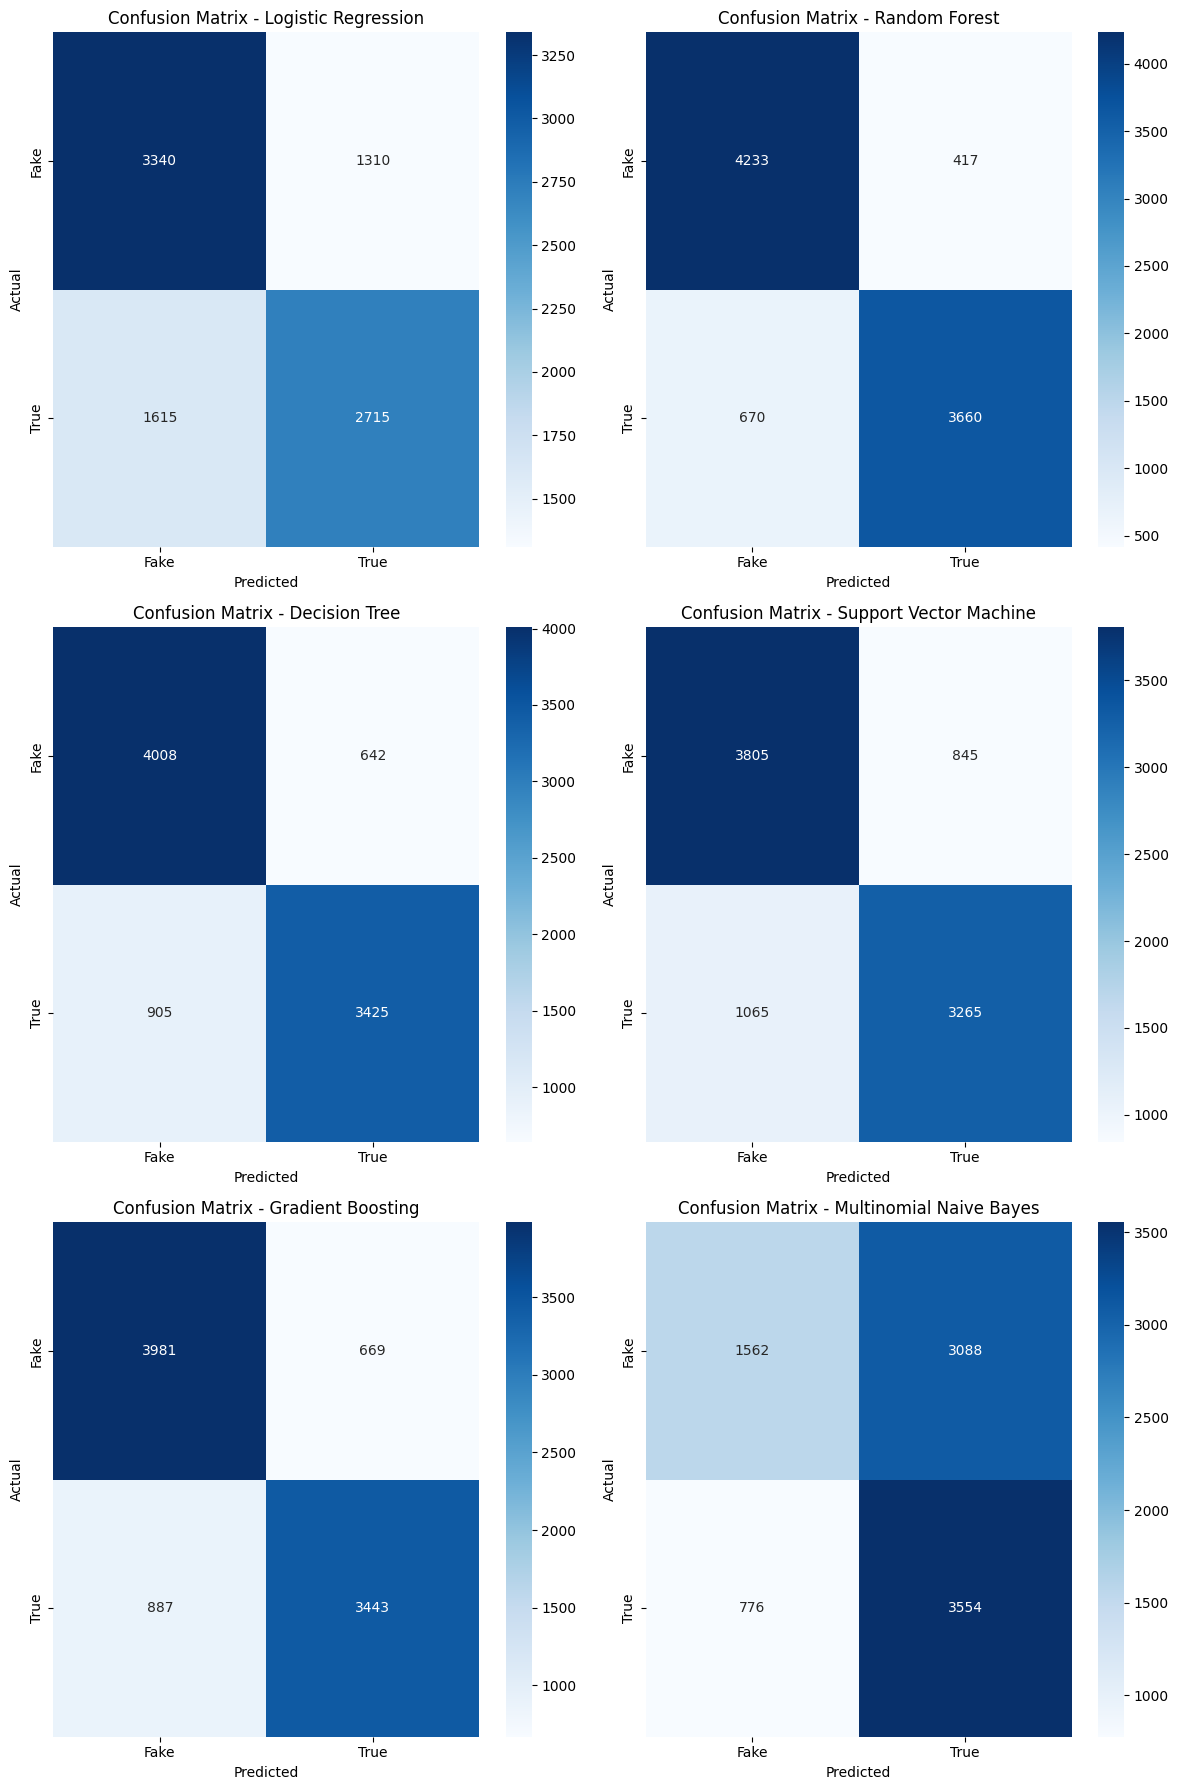

In [ ]:
# Calculate number of classifiers
num_classifiers = len(classifiers)

# Calculate number of rows and columns for subplots
num_rows = (num_classifiers + 1) // 2  # Add 1 to ensure we have enough rows for odd numbers
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 6))

# Flatten axes if only one row
if num_rows == 1:
    axes = [axes]

# Iterate over each classifier
for (name, classifier), ax in zip(classifiers.items(), axes.flatten()):
    # Train the model on the training data
    classifier.fit(list(X_train), y_train)

    # Predict on the testing data
    y_pred = classifier.predict(list(X_test))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'], ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


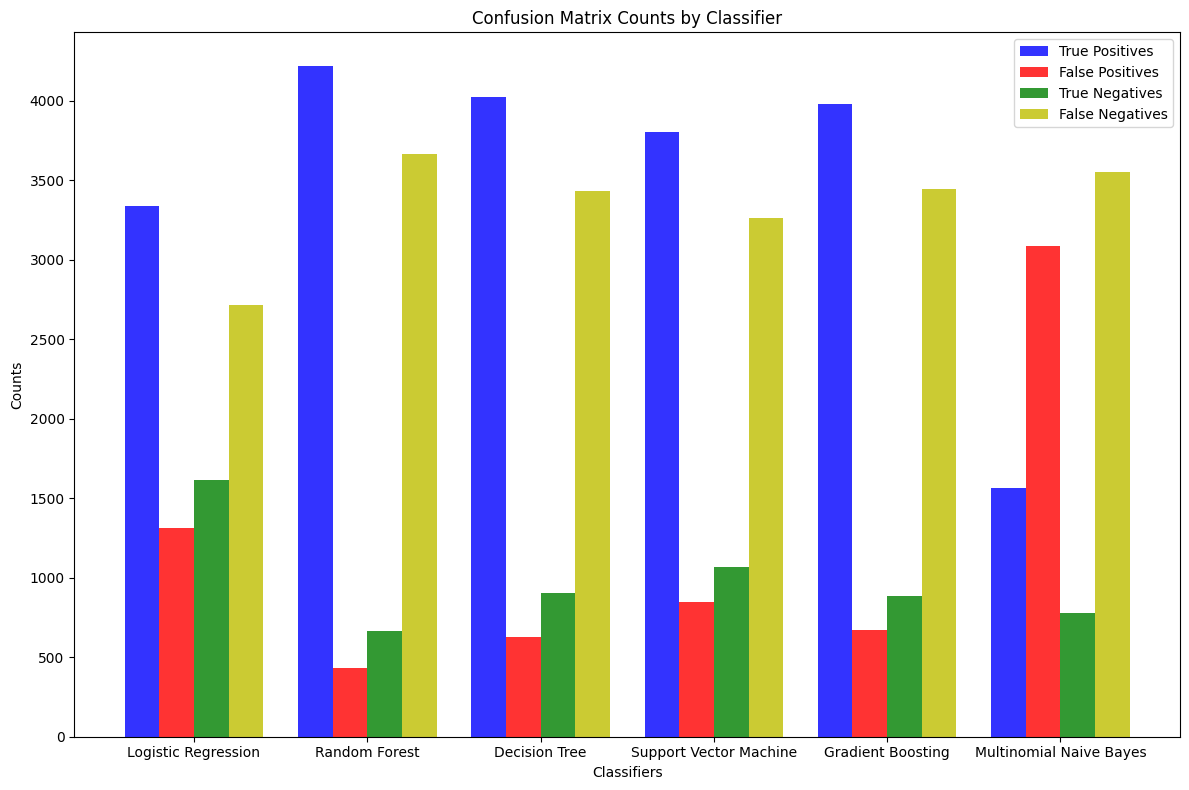

In [2]:
import matplotlib.pyplot as plt

# Define the data
classifiers = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'Gradient Boosting', 'Multinomial Naive Bayes']
true_positives = [3340, 4219, 4021, 3805, 3981, 1562]
false_positives = [1310, 431, 629, 845, 669, 3088]
true_negatives = [1615, 668, 901, 1065, 887, 776]
false_negatives = [2715, 3662, 3429, 3265, 3443, 3554]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each classifier
bar_width = 0.2
index = range(len(classifiers))
opacity = 0.8

plt.bar(index, true_positives, bar_width, alpha=opacity, color='b', label='True Positives')
plt.bar([i + bar_width for i in index], false_positives, bar_width, alpha=opacity, color='r', label='False Positives')
plt.bar([i + 2*bar_width for i in index], true_negatives, bar_width, alpha=opacity, color='g', label='True Negatives')
plt.bar([i + 3*bar_width for i in index], false_negatives, bar_width, alpha=opacity, color='y', label='False Negatives')

plt.xlabel('Classifiers')
plt.ylabel('Counts')
plt.title('Confusion Matrix Counts by Classifier')
plt.xticks([i + 1.5*bar_width for i in index], classifiers)
plt.legend()

plt.tight_layout()
plt.show()
